In [41]:
import pandas as pd
import numpy as np

In [42]:
data = pd.read_csv("korean_air_2020_01.csv")
#second = pd.read_csv("korean_air_data_korean_air_2020_02.csv")
#third = pd.read_csv("korean_air_data_korean_air_2020_07.csv")
#fourth = pd.read_csv("korean_air_data_korean_air_2020_08.csv")
#fifth = pd.read_csv("korean_air_data_korean_air_2020_09.csv")
#sixth = pd.read_csv("korean_air_data_korean_air_2020_10.csv")

#data = pd.concat([first, second, third, fourth, fifth, sixth])

In [43]:
data = data.dropna()
data.columns = ["a","title","text","repoter","spon", "date"]
date = data.date

In [44]:
#q불용어 지정
#기자이름
repoter = data["repoter"].unique

In [45]:
#신문사 이름
spon = data["spon"].unique

In [46]:
#대표적인 조사
stopwords = ['의','가','이','권','은','들','는','좀','잘','걍','과','도','을','것','를','등','으로','자','에','등','와','한','하다''것','로']

In [47]:
#불용어 병합
stopwords.extend(data.repoter.values)
stopwords.extend(data.spon.values)

In [48]:
len(data)

432

In [49]:
# 한글 외의 모든 데이터 제거 : 기업명이 영어로 되어있는 경우를 어떻게 처리 해야할까?
data = data.text.str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")

from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer

okt = Okt()
X_train = []
X_train2 =[]

for sen in data :
    temp_X = []
    
    # 토큰화
    temp_X = okt.morphs(sen, stem = True) 
    
    # 불용어 제거
    temp_X = [word for word in temp_X if not word in stopwords] 
    
    #모든 토큰들을 리스트에 기사별로 저장
    X_train.append(temp_X)
    
    #모든 토큰들을  하나의 리스트에 저장
    X_train2.extend(temp_X)

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
vocab_size = total_cnt - rare_cnt
print('단어 집합의 크기 :',vocab_size)

단어 집합(vocabulary)의 크기 : 8592
등장 빈도가 2번 이하인 희귀 단어의 수: 4133
단어 집합에서 희귀 단어의 비율: 48.10288640595903
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.481598379020788
단어 집합의 크기 : 4459


In [50]:
import datetime
def getDayName(a):
    D = a.split("/")
    y = int(D[0])
    m = int(D[1])
    d = int(D[2])
    return ['MON','TUE','WED','THU','FRI','SAT','SUN'][datetime.date(y,m,d).weekday()]

In [51]:
weekday =[]
for x in date:
    weekday.append(getDayName(x))
    

In [52]:
date = date.tolist()

In [53]:
DATE = []
for x in date:
    if x not in DATE:
        DATE.append(x)
print(DATE)

['2020/01/31', '2020/01/30', '2020/01/29', '2020/01/28', '2020/01/27', '2020/01/26', '2020/01/25', '2020/01/24', '2020/01/23', '2020/01/22', '2020/01/21', '2020/01/20', '2020/01/19', '2020/01/18', '2020/01/17', '2020/01/16', '2020/01/15', '2020/01/14', '2020/01/13', '2020/01/12', '2020/01/11', '2020/01/10', '2020/01/09', '2020/01/08', '2020/01/07', '2020/01/06', '2020/01/05', '2020/01/01']


In [161]:
#증감 데이터 불러오기
increase_r = pd.read_csv("대비처리.csv")

In [162]:
increase = increase_r[["년/월/일","증감"]]

In [57]:
weekday_frame = pd.DataFrame( {"date" : date,"weekday" : weekday})

In [58]:
 for x in range(0,len(weekday_frame)-1):
    if weekday_frame.weekday[x] == "SAT":
        monday = DATE.index(weekday_frame.date[x])- 2
        weekday_frame.date[x] = DATE[monday]
        weekday_frame.weekday[x] == "MON"
            
    else :
        if weekday_frame.weekday[x] == "SUN":
            monday = DATE.index(weekday_frame.date[x]) - 1
            weekday_frame.date[x] = DATE[monday]
            weekday_frame.weekday[x] == "MON"
                
        else : pass
                

In [59]:
weekday_frame.date.unique()

array(['2020/01/31', '2020/01/30', '2020/01/29', '2020/01/28',
       '2020/01/27', '2020/01/24', '2020/01/23', '2020/01/22',
       '2020/01/21', '2020/01/20', '2020/01/17', '2020/01/16',
       '2020/01/15', '2020/01/14', '2020/01/13', '2020/01/10',
       '2020/01/09', '2020/01/08', '2020/01/07', '2020/01/06',
       '2020/01/01'], dtype=object)

In [60]:
weekday_frame = weekday_frame.drop_duplicates()

In [61]:
weekday_frame.to_csv("weekday.csv")

In [62]:
#날자를 중심으로 데이터 병합
increase = increase.rename(columns ={ "년/월/일" : "date"})

In [63]:
dic_frame = pd.DataFrame({"data" : X_train, "date" : date})

In [64]:
increase2 = pd.merge(weekday_frame, increase , on = "date")

In [65]:
del increase2["weekday"]

In [67]:
increase2 = increase2.drop_duplicates()

In [68]:
dic_frame2 = pd.merge( dic_frame, increase2, on = "date", how = "left")

In [140]:
dic = dic_frame2.fillna(0)

In [141]:
#딕셔너리 key 생성
key_list = []
for v in X_train2:
    if v not in key_list:
        key_list.append(v)

In [142]:
dic

,data,date,증감
0,"[남매, 난, 촉발, 되다, 한진, 그룹, 경영, 분쟁, 정점, 치닫다, 있다, 그...",2020/01/31,0.0
1,"[한진, 그룹, 경영, 향배, 가르다, 월, 한진, 칼, 주주총회, 앞두다, 조현아...",2020/01/31,0.0
2,"[줄어들다, 비행, 수당, 처우, 대한, 정보, 아직, 없다, 신종, 코로나바이러스...",2020/01/31,0.0
3,"[한진, 남매, 경영, 분쟁, 본격, 화, 입장, 문, 경영, 일선, 안, 나서다,...",2020/01/31,0.0
4,"[앵커, 오늘, 우한, 교민, 이송, 전세기, 에는, 조원태, 한진, 그룹, 회장,...",2020/01/31,0.0
...,...,...,...
427,"[성윤, 모, 오른쪽, 세번, 째, 산업, 통상, 자원부, 장관, 일, 인천공항, ...",2020/01/01,0.0
428,"[세종, 권혜민, 기자, 일본, 정부, 수출, 규제, 강화, 조치, 미국, 중국, ...",2020/01/01,0.0
429,"[경제, 기상도, 업종, 별, 전망, 항공, 국내, 항공, 업다, 올해, 침체, 기...",2020/01/01,0.0
430,"[삼, 성, 현, 기차, 국내, 주요, 대기업, 년, 내, 클라우드, 도입, 마무리...",2020/01/01,0.0


In [75]:
#예상 소요 시간 300분
#사전 만들기
dictionary = {"<UNK>" : { "횟수" : 0, "점수" : 0, "극성정도" : 0}}

for k in key_list:  #키 리스트안에 있는 단어가 언급이 되는 경우
    count = 0
    score = 0
    for x in range(0,len(dic)):  #한 기사씩 검사한다.
        d = dic.loc[x,:].data
        
        
        #count 는 전체 언급된 횟수, score는 증감의 총합, pority는 총합의 평균
        if k in d:            
            count = count + d.count(k)
            score = score + (dic.loc[x,:]["증감"] * d.count(k))
        
       
        #elif k not in word_list:
        else:
            pass

    polarity  = score/count
    dictionary[k] = { "횟수" : count, "점수" : score, "극성정도" : polarity}  

In [121]:
from collections import Counter
scores = []
for x in range (0, len(dic)):
    key = set(dic.data[x])
    score = 0
    count = 0
    for i in key:
        score += (dictionary[i]["극성정도"] * Counter(dic.data[x])[i])
        count += Counter(dic.data[x])[i]
    try :
        score = score/count
        scores.append(score)
        
    except ZeroDivisionError as e:
        print(x,k)
        mis = x

227 미온


In [122]:
mis

227

In [116]:
import matplotlib.pyplot as plt

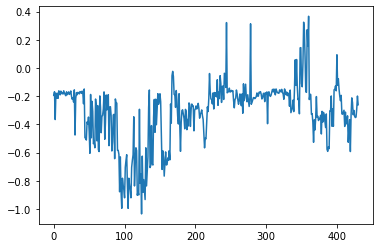

In [117]:
#기사별 점수 비교
plt.plot(scores)

In [143]:
#이상치 제거
dic.drop([mis], inplace=True)

In [144]:
dic["score"] = scores

In [148]:
#날자별 점수 평균계산
score_data = dic.groupby(['date'])["score"].mean()

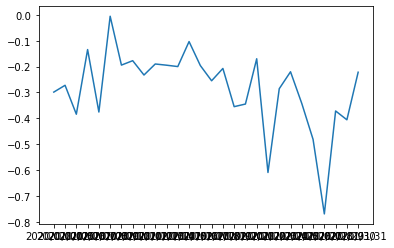

In [152]:
#날자별 점수 그래프
plt.plot(score_data)

In [196]:
#종가와 비교해보기
increase_plot = increase_r[["년/월/일","종가"]].replace(',', '', regex=True)

In [198]:
cost = increase_plot.loc[167:186]

In [199]:
cost = cost.append({"년/월/일" : "2020/01/01", "종가" : 27850}, ignore_index = True)

In [201]:
cost["종가"] = cost.종가.astype(int)

In [204]:
cost = cost.rename(columns ={ "년/월/일" : "date"})

In [208]:
a = pd.merge(cost, score_data,on = "date")

In [212]:
a["date"] = a.date.astype(str)

In [227]:
a = a[::-1]

In [228]:
a = a.reset_index()

In [230]:
del a["index"]

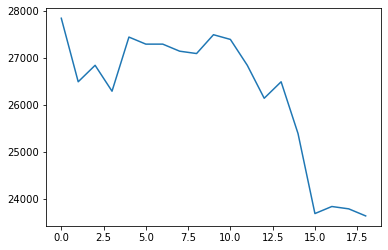

In [232]:
plt.plot(a.종가)

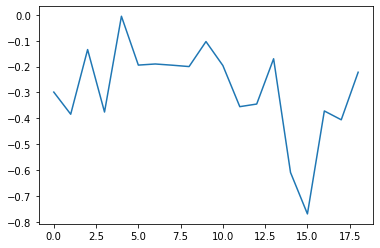

In [233]:
plt.plot(a.score)